In [1]:
import pandas as pd
import numpy as np
import qiskit

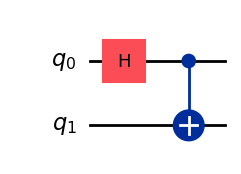

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

qc.h(0)      # Step 1: Put qubit 0 into superposition
qc.cx(0, 1)  # Step 2: Apply CNOT (control: q0, target: q1)

qc.draw('mpl')

In [3]:
%matplotlib inline

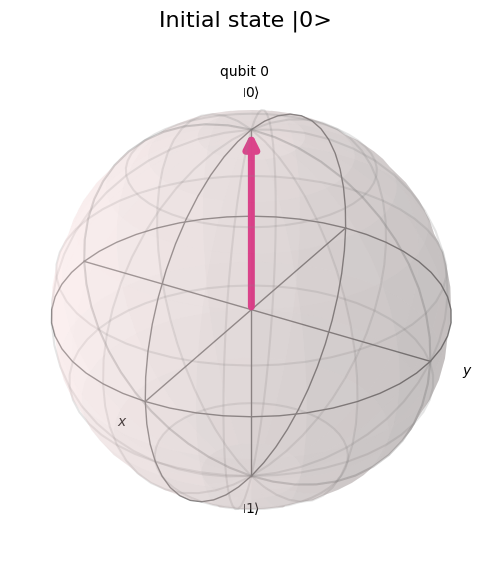

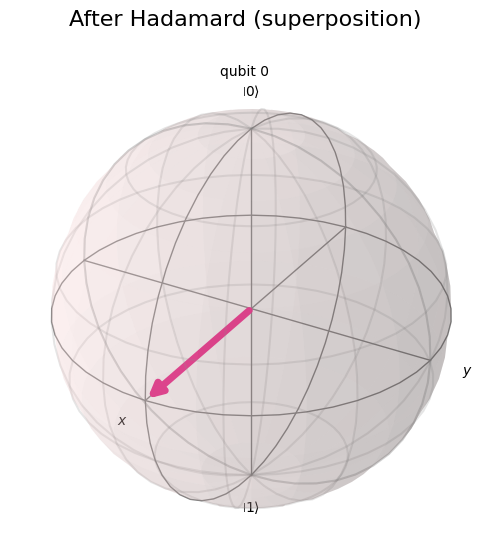

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# Ensure inline plotting
%matplotlib inline

# Initial state |0>
initial_state = Statevector.from_label('0')

# Apply Hadamard gate matrix to the state
hadamard_matrix = [[1/2**0.5, 1/2**0.5],
                   [1/2**0.5, -1/2**0.5]]
final_state = initial_state.evolve(hadamard_matrix)

# Plot initial state
fig1 = plot_bloch_multivector(initial_state.data, title="Initial state |0>", figsize=(5, 5))
fig1.tight_layout()  # Adjust layout for better visibility

# Plot final state
fig2 = plot_bloch_multivector(final_state.data, title="After Hadamard (superposition)", figsize=(5, 5))
fig2.tight_layout()  # Adjust layout for better visibility

plt.show()

In [7]:
!pip install --upgrade "qiskit[visualization]"

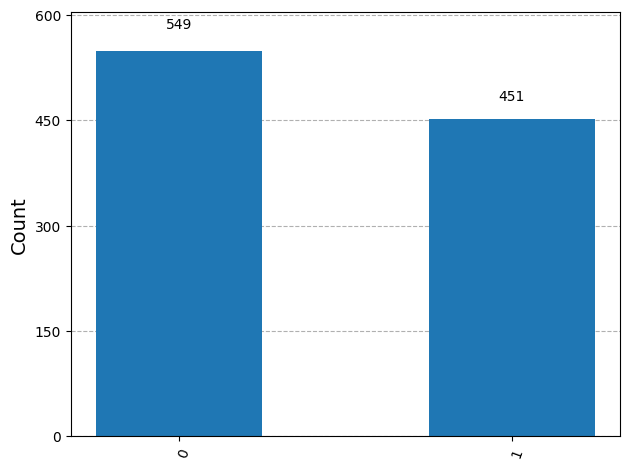

In [14]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

# Get backend
sim = Aer.get_backend('qasm_simulator')

# Transpile circuit (required in v2.0)
from qiskit import transpile
tqc = transpile(qc, backend=sim)

# Run job
job = sim.run(tqc, shots=1000)

# Get results
result = job.result()
counts = result.get_counts()

# Plot
plot_histogram(counts)
plt.show()


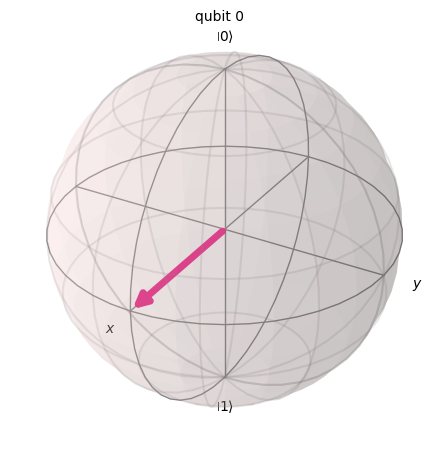

In [15]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Create a single qubit circuit
qc = QuantumCircuit(1)
qc.h(0)  # Apply Hadamard

# Get the statevector
sim = Aer.get_backend('statevector_simulator')
state = Statevector.from_instruction(qc)

# Plot Bloch sphere
plot_bloch_multivector(state)
plt.show()


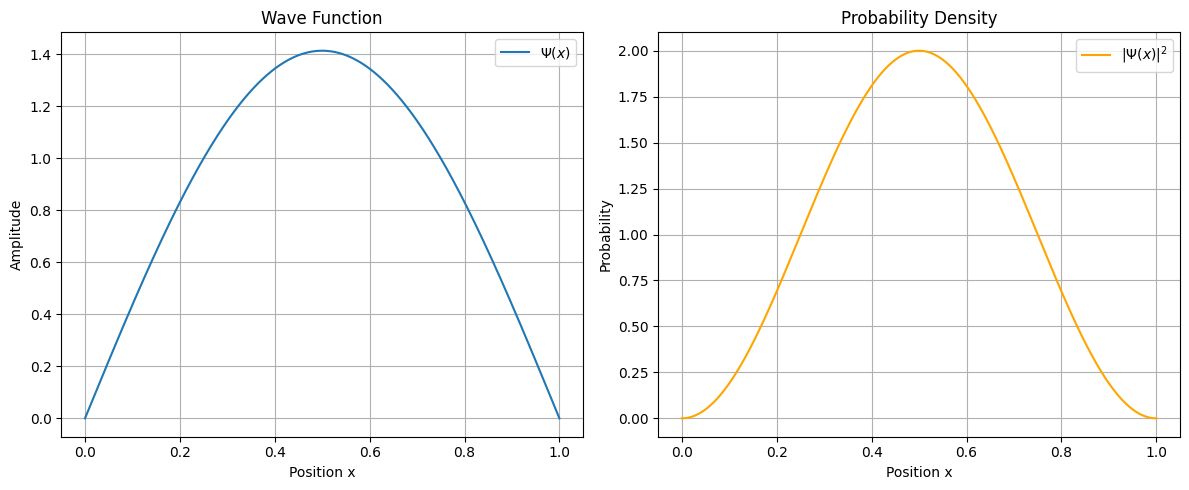

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1  # Box length
x = np.linspace(0, L, 1000)  # Position grid

# Wavefunction for n=1 (ground state)
n = 1
psi = np.sqrt(2/L) * np.sin(n * np.pi * x / L)

# Probability density
prob_density = psi**2

# Plotting
plt.figure(figsize=(12,5))

# Wavefunction
plt.subplot(1,2,1)
plt.plot(x, psi, label=r'$\Psi(x)$')
plt.title('Wave Function')
plt.xlabel('Position x')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Probability Density
plt.subplot(1,2,2)
plt.plot(x, prob_density, label=r'$|\Psi(x)|^2$', color='orange')
plt.title('Probability Density')
plt.xlabel('Position x')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
